In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
#Tensorflow_Chart_Data_Epoch_20200315_235pm

C:\Users\pcpow\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pcpow\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pcpow\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pcpow\Anaconda3\envs\Tensorflow\lib\site-packages

In [2]:
# Parameters
#learning_rate = 0.01
learning_rate = 0.1
#learning_rate = 0.2

#training_epochs = 1000
#display_step = 50

training_epochs = 1
display_step = 1



In [3]:
# Training Data
#17 examples
train_X = numpy.asarray([2,4,6,8,10,12,14,16,18,20])
train_Y = numpy.asarray([1,2,3,4,5,6,7,8,9,10])
                         
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
#W = tf.Variable(rng.randn(), name="weight")
W = tf.Variable(1.0, name="weight")


#b = tf.Variable(rng.randn(), name="bias")
b = tf.Variable(3.0, name="bias")

##W = tf.Variable(.1, name="weight")
##b = tf.Variable(.1, name="bias")

print ("W:", W)
print ("b:", b)


W: <tf.Variable 'weight:0' shape=() dtype=float32_ref>
b: <tf.Variable 'bias:0' shape=() dtype=float32_ref>


In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)
#PCP 20200314
print("pred=", pred)

pred= Tensor("Add:0", dtype=float32)


In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0001 cost= 31.638799667 W= 0.92 b= 2.96
Epoch: 0001 cost= 15.987596512 W= 0.7344 b= 2.9136
Epoch: 0001 cost= 3.383909941 W= 0.47519997 b= 2.8704
Epoch: 0001 cost= 0.963124096 W= 0.26143998 b= 2.84368
Epoch: 0001 cost= 1.376020789 W= 0.21563199 b= 2.8390992
Epoch: 0001 cost= 0.878892899 W= 0.28443 b= 2.8448324
Epoch: 0001 cost= 0.879252374 W= 0.30867067 b= 2.8465638
Epoch: 0001 cost= 1.035994530 W= 0.34302354 b= 2.8487108
Epoch: 0001 cost= 1.007259607 W= 0.33885938 b= 2.8484795
Epoch: 0001 cost= 1.933916092 W= 0.41372606 b= 2.852223
Optimization Finished!
Training cost= 1.9339161 W= 0.41372606 b= 2.852223 



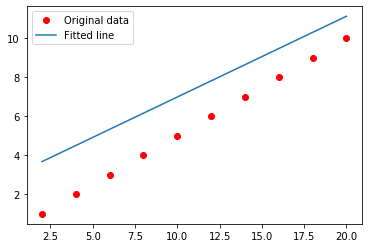

In [9]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

            #Display logs per epoch step
            if (epoch+1) % display_step == 0:
                c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
                #WORKY        
                print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
                
                #PCP Display other variables / results
                print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
                
                

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()